In [10]:
#import all necessary libraries
import pandas as pd
import numpy as np 
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [11]:
#load the wine dataset
wine_data=load_wine()
X=pd.DataFrame(wine_data.data,columns=wine_data.feature_names)
Y=pd.Series(wine_data.target)

In [12]:
#Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [13]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [14]:
#Using StandardScaler to standardize the features 
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(X_train)
x_test_sc=scaler.transform(X_test)

In [15]:
#Create and train the Logistic Regression Model
log_reg=LogisticRegression()
log_reg.fit(x_train_sc,y_train)


LogisticRegression()

In [16]:
#Create and train the Decision Tree model
DTC=DecisionTreeClassifier()
DTC.fit(x_train_sc,y_train)

DecisionTreeClassifier()

In [17]:
#Make Predictions using both models
y_pred_lr=log_reg.predict(x_test_sc)
y_pred_dt=DTC.predict(X_test)

c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [18]:
# Evaluation for Logistic Regression
print("Logistic Regression Evaluation:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision Score: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")


Logistic Regression Evaluation:
Accuracy Score: 0.9722
Precision Score: 0.9741
Recall Score: 0.9722
F1 Score: 0.9720


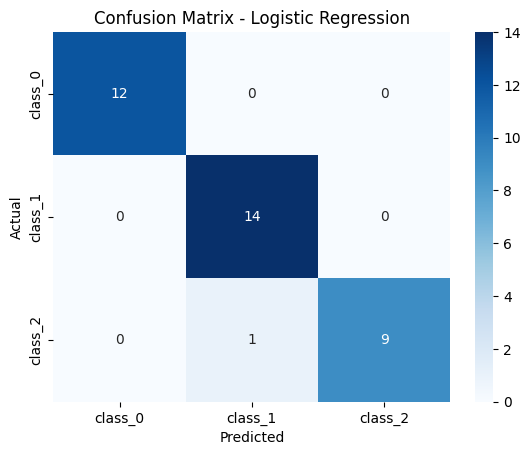

In [19]:
# Confusion Matrix for Logistic Regression
cf_matrix_log=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cf_matrix_log, annot=True, cmap="Blues", xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [28]:
# Evaluation for Decision Tree Classifier
print("\nDecision Tree Evaluation:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision Score: {precision_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"Recall Score: {recall_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt, average='weighted'):.4f}")


Decision Tree Evaluation:
Accuracy Score: 0.3333
Precision Score: 0.1111
Recall Score: 0.3333
F1 Score: 0.1667


c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


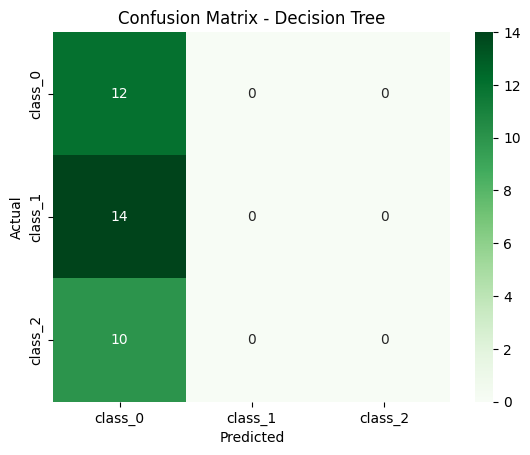

In [21]:
# Confusion Matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_tree, annot=True, cmap="Greens", xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


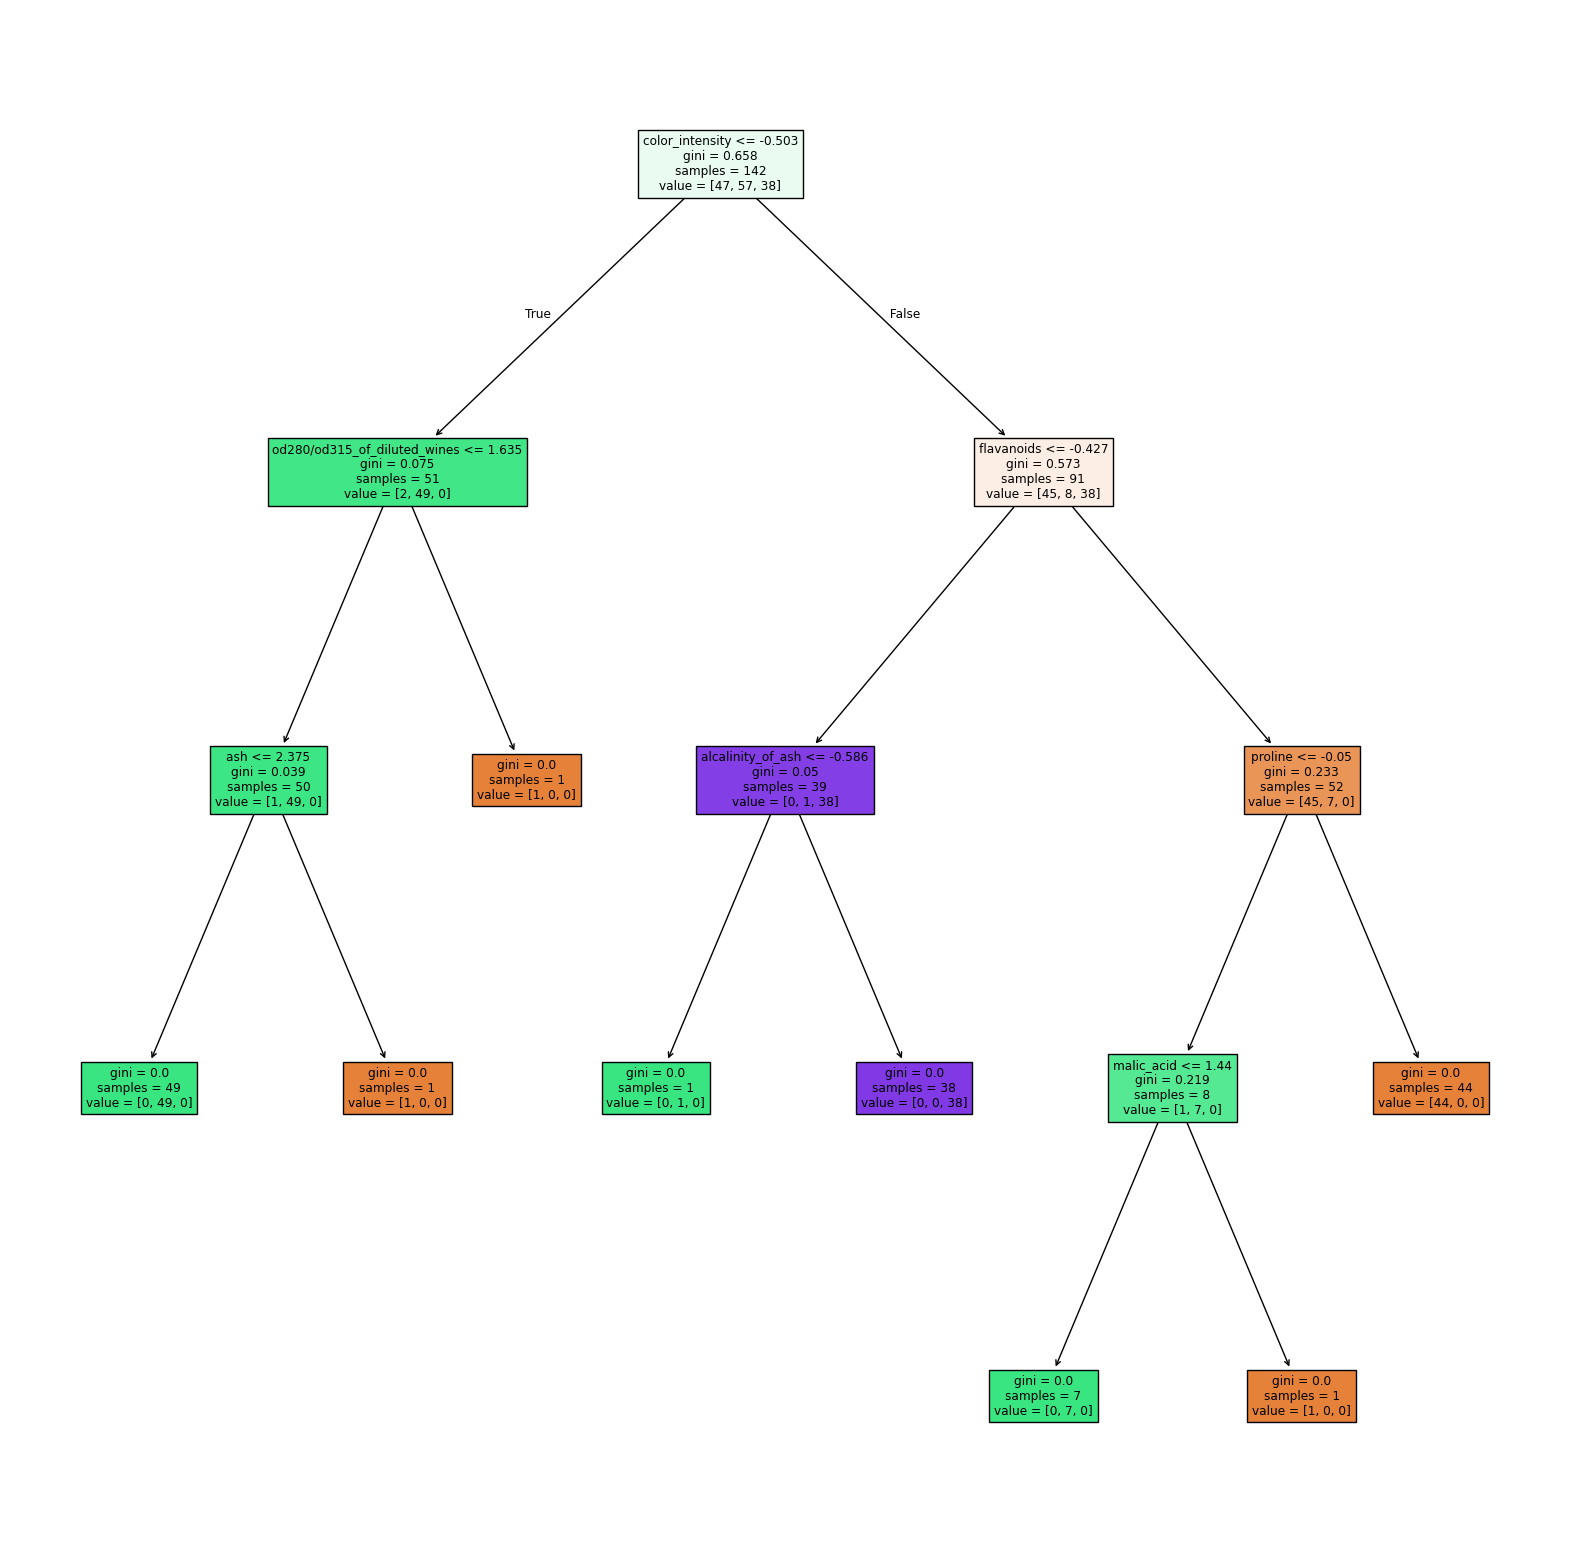

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(DTC,filled=True,feature_names=X.columns)
plt.show()

In [23]:
pickle.dump(scaler,open('wine_scaler.pkl','wb'))

In [24]:
pickle.dump(log_reg,open('wine_log_reg.pkl','wb'))
pickle.dump(DTC,open('wine_dtc.pkl','wb'))

NameError: name 'y_true' is not defined